In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [120]:
diabetes = pd.read_csv('diabetes.csv')

In [121]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [122]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [123]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:>

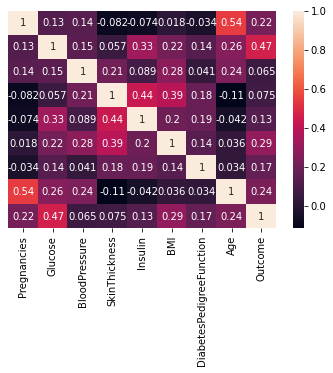

In [124]:
sns.heatmap(diabetes.corr(), annot=True, yticklabels=False)

<AxesSubplot:>

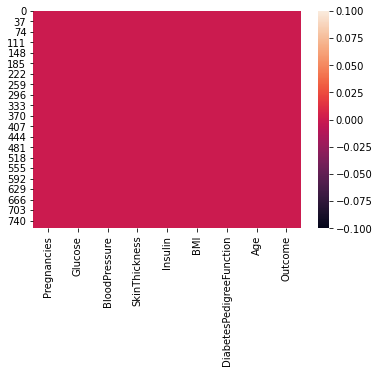

In [125]:
sns.heatmap(diabetes.isnull())

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

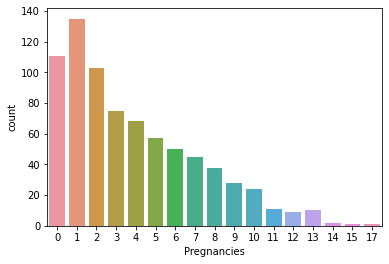

In [126]:
sns.countplot(diabetes['Pregnancies'])

<AxesSubplot:xlabel='Age', ylabel='count'>

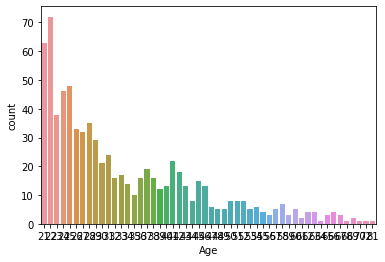

In [127]:
sns.countplot(diabetes['Age'])

<AxesSubplot:xlabel='Outcome', ylabel='count'>

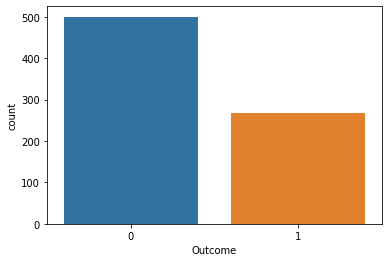

In [128]:
sns.countplot(diabetes['Outcome'])

In [129]:
features = diabetes.drop(['Outcome'], axis='columns')
target = diabetes['Outcome']

In [130]:
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [131]:
target.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=101, test_size=0.2)

In [134]:
from sklearn.svm import SVC

In [135]:
model = SVC()

In [136]:
model.fit(X_train, y_train)

SVC()

In [137]:
accuracy = 100 * (model.score(X_test, y_test))

accuracy

80.51948051948052

In [138]:
predictions = model.predict(X_test)

In [139]:
predictions

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [140]:
from sklearn.metrics import classification_report, confusion_matrix

In [141]:
print(confusion_matrix(y_test, predictions))

[[96  7]
 [23 28]]


In [142]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       103
           1       0.80      0.55      0.65        51

    accuracy                           0.81       154
   macro avg       0.80      0.74      0.76       154
weighted avg       0.80      0.81      0.79       154



<AxesSubplot:>

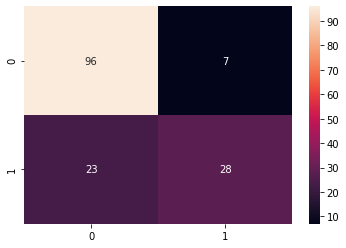

In [143]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [144]:
pred = model.predict(features)

In [145]:
results = pd.DataFrame({
    'Original' : diabetes['Outcome'], 'Predicted': pred
})

In [146]:
results

,Original,Predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,1,0
...,...,...
763,0,0
764,0,0
765,0,0
766,1,0


In [147]:
results.to_csv('diabetes_results.csv')